In [5]:
import os
os.getcwd()

'C:\\Users\\Olan'

In [6]:
os.chdir('C:\Olan Backup\ML\Regression')
os.getcwd()

### Simple Linear Regression

##### Reading input dataset

In [8]:
import pandas as pd
df=pd.read_csv('tvmarketing.csv')

In [15]:
print("Number of rows:",len(df))
print("Number of features:",len(df.columns)-1)

Number of rows: 200
Number of features: 1


In [16]:
feature_variable=df.iloc[:,:-1]
target_variable=df.iloc[:,-1:]

In [17]:
feature_variable

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [18]:
target_variable

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [36]:
X = feature_variable.to_numpy().reshape(-1, 1)
y = target_variable.to_numpy().reshape(-1, 1)

### Scatter plot - feature and target

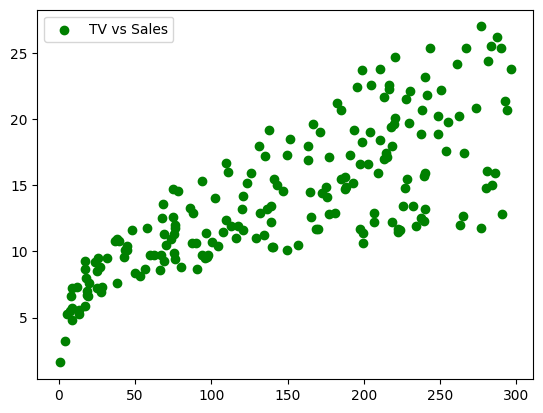

In [54]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X, y, c='g', label='TV vs Sales')
plt.legend()
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Training

In [42]:
linear_reg_model = LinearRegression()

In [44]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = linear_reg_model.predict(X_test)

### Metrics

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [48]:
adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X.shape[1] - 1)
rmse_val = mean_squared_error(y_test, y_pred, squared=False)
mape_val = mean_absolute_percentage_error(y_test, y_pred)

# Print the metrics
print("Adjusted R^2:", adj_r2)
print("RMSE:", rmse_val)
print("MAPE:", mape_val)

Adjusted R^2: 0.6657830284980398
RMSE: 2.9951613049072354
MAPE: 0.18069079361253754


### best fit line
##### For the same testing features - scatter plot to see actuals and line plot to see predicted values

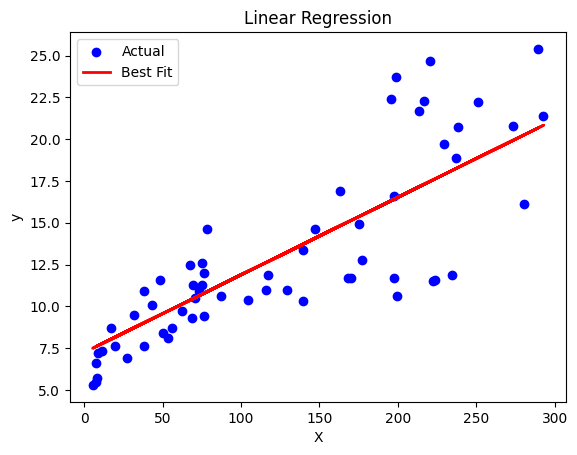

In [58]:
# y_test (test label) is what you see as blue in the graph
plt.scatter(X_test, y_test, color='blue', label='Actual')

# # Plot the best-fit line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Best Fit')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Ridge Regression

In [28]:
import numpy as np

In [14]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [19]:
features=data.data
target=data.target

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred=lr.predict(X_test)

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score :",r2_score(y_test,y_pred))
print("RMSE score :",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score : 0.45260276297191937
RMSE score : 53.85344583676593


In [ ]:
# Comparing the linear regresion results with Ridge Regression

In [54]:
from sklearn.linear_model import Ridge
rr=Ridge()

In [55]:
parameters = {'alpha':[0.0001, 100]}

In [56]:
from sklearn.model_selection import GridSearchCV
ridge_reg_hyper_param_tuning= GridSearchCV(estimator=rr, param_grid=parameters, scoring='neg_mean_squared_error',cv=5)

In [57]:
ridge_reg_hyper_param_tuning.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.0001, 100]},
             scoring='neg_mean_squared_error')

In [58]:
rr=ridge_reg_hyper_param_tuning.best_estimator_

In [59]:
rr.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [60]:
y_pred1=rr.predict(X_test)

In [61]:
# barely any increase
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score :",r2_score(y_test,y_pred1))
print("RMSE score :",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score : 0.4526998154220099
RMSE score : 53.84867157029351


### Lasso Regression

In [62]:
from sklearn.linear_model import Lasso

In [84]:
lasso=Lasso(alpha=0.1)

In [85]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [86]:
y_pred_lasso=lasso.predict(X_test)

In [87]:
# barely any increase
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score :",r2_score(y_test,y_pred_lasso))
print("RMSE score :",np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

R2 score : 0.4718547867276227
RMSE score : 52.897953506442185
